In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import configs
import os
from deer.agent import NeuralAgent
from deer.learning_algos.CRAR_torch import CRAR  
import deer.controllers as bc 
import yaml
from deer.policies import EpsilonGreedyPolicy, FixedFigure8Policy     

In [2]:
from deer.environments.Figure8 import MyEnv as Env 

In [3]:
fname = 'altT_mf'

In [4]:
engram_dir = '/Volumes/aronov-locker/Ching/rl/'

In [5]:
with open(f'{engram_dir}params/{fname}.yaml', 'r') as f:
    parameters = yaml.safe_load(f)

In [6]:
policy_eps=0.5

In [7]:
env = Env(                                                                     
    give_rewards=parameters['figure8_give_rewards'],                           
    higher_dim_obs=parameters['higher_dim_obs'],                               
    show_rewards=parameters['show_rewards'], plotfig=False                     
    ) 

In [10]:
rng = np.random.RandomState()
learning_algo = CRAR(                                                          
    env, parameters['freeze_interval'], parameters['batch_size'], rng,         
    internal_dim=parameters['internal_dim'], lr=parameters['learning_rate'],
    nn_yaml=parameters['nn_yaml'], yaml_mods=parameters['yaml_mods'],          
    double_Q=True, loss_weights=parameters['loss_weights'],                    
    encoder_type=parameters['encoder_type'], mem_len=parameters['mem_len'],
    train_len=parameters['train_len']  
    )   

TypeError: CRAR.__init__() got an unexpected keyword argument 'train_len'

In [9]:
train_policy = EpsilonGreedyPolicy(                                     
    learning_algo, env.nActions(), rng, epsilon=policy_eps)             
test_policy = EpsilonGreedyPolicy(                                      
    learning_algo, env.nActions(), rng, 0.)  

In [39]:
agent = NeuralAgent(                                                        
    env, learning_algo, parameters['replay_memory_size'], 1,                
    parameters['batch_size'], rng, save_dir=engram_dir,                     
    train_policy=train_policy, test_policy=test_policy)
agent.attach(bc.LearningRateController(                                     
    initial_learning_rate=parameters['learning_rate'],                      
    learning_rate_decay=parameters['learning_rate_decay'],                  
    periodicity=1))                                                         
agent.attach(bc.TrainerController(                                          
    evaluate_on='action',  periodicity=parameters['update_frequency'],      
    show_episode_avg_V_value=True, show_avg_Bellman_residual=True))         
best_controller = bc.FindBestController(                                    
    validationID=Env.VALIDATION_MODE, testID=None, unique_fname=fname)      
agent.attach(best_controller)                                               
agent.attach(bc.InterleavedTestEpochController(                             
    id=Env.VALIDATION_MODE, epoch_length=parameters['steps_per_test'],      
    periodicity=1, show_score=True, summarize_every=10, unique_fname=fname))

In [40]:
parameters['fname']

'altT_dm_dim16/altT_mf_0'

In [41]:
agent.setNetwork(parameters['fname'] + '/fname', nEpoch=40)

RuntimeError: Error(s) in loading state_dict for Encoder:
	size mismatch for fc.0.weight: copying a param with shape torch.Size([32, 176]) from checkpoint, the shape in current model is torch.Size([32, 384]).

In [ ]:
agent._in_episode = True
agent._mode = 0 # Testing mode with plan_depth=0
initState = env.reset(agent._mode)
inputDims = env.inputDimensions()
for i in range(len(inputDims)):
    if inputDims[i][0] > 1:
        agent._state[i][1:] = initState[i][1:]
agent._Vs_on_last_episode = []
is_terminal = False
reward = 0

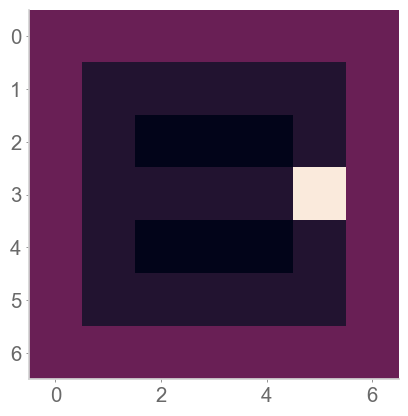

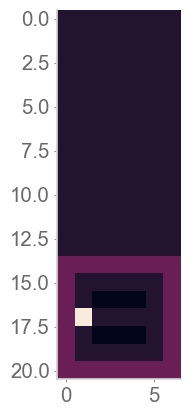

tensor([[0.4392, 0.3898, 0.5463, 0.3688]])
=====-===========


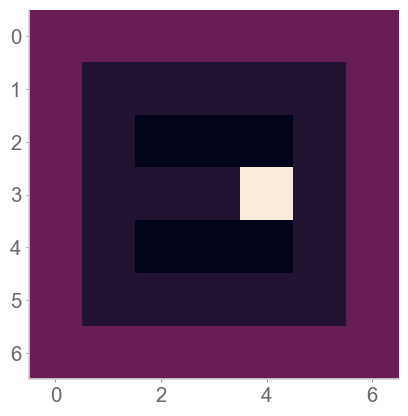

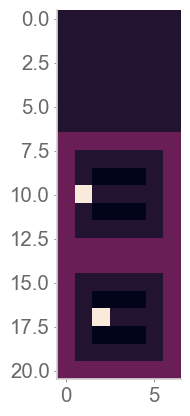

tensor([[0.6510, 0.6182, 0.7168, 0.5008]])
=====-===========


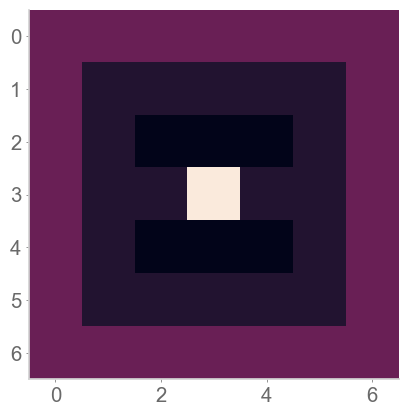

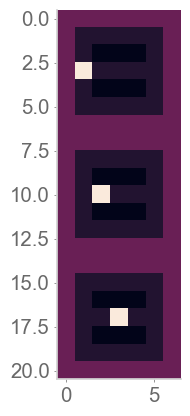

tensor([[0.9094, 0.8965, 1.0046, 0.8265]])
=====-===========


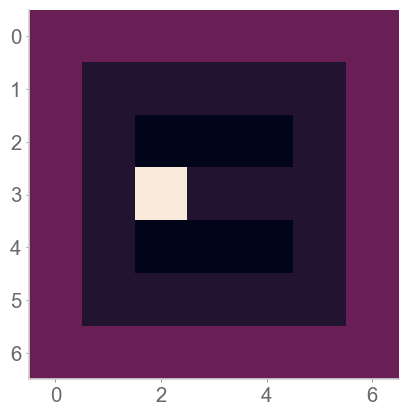

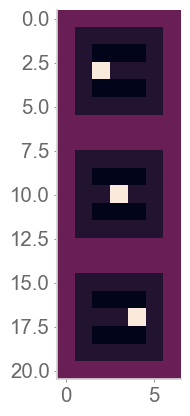

tensor([[1.0148, 0.9970, 1.1124, 0.8815]])
=====-===========


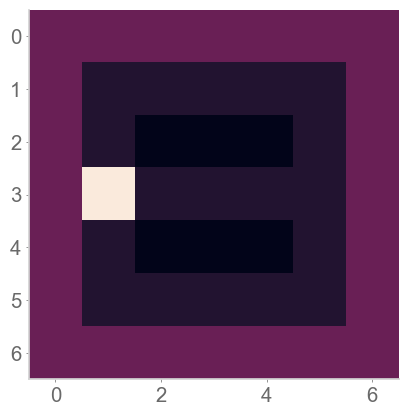

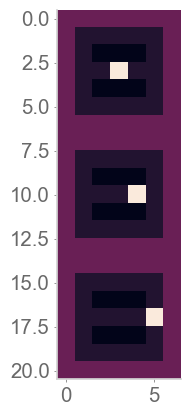

tensor([[1.2404, 1.0458, 1.1145, 1.0039]])
=====-===========


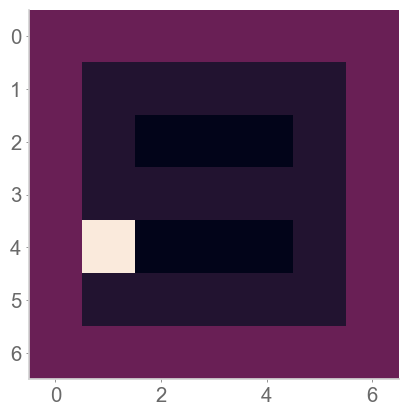

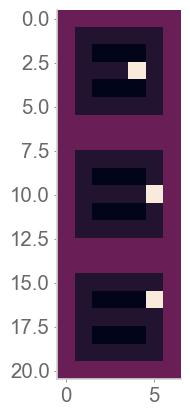

tensor([[1.3816, 1.2230, 1.2142, 1.2171]])
=====-===========


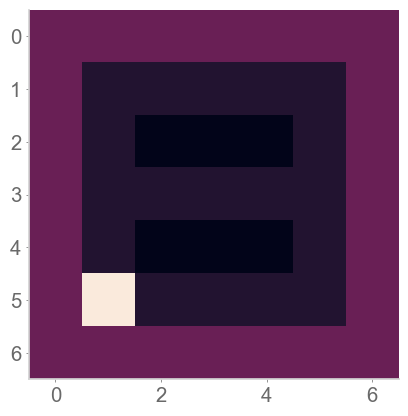

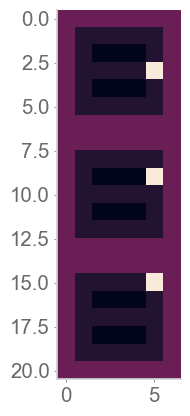

tensor([[0.8189, 0.9542, 0.7803, 0.8605]])
=====-===========


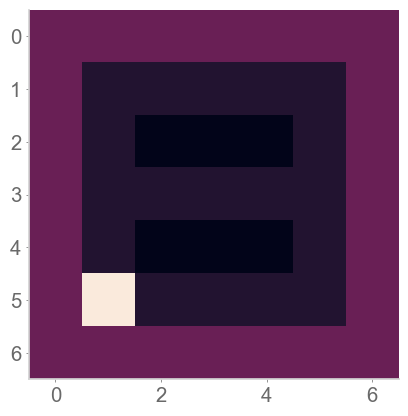

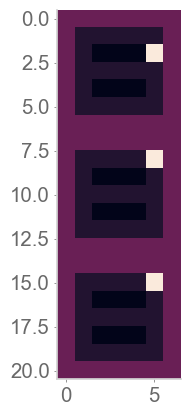

tensor([[0.7795, 0.8582, 0.7863, 0.8890]])
=====-===========


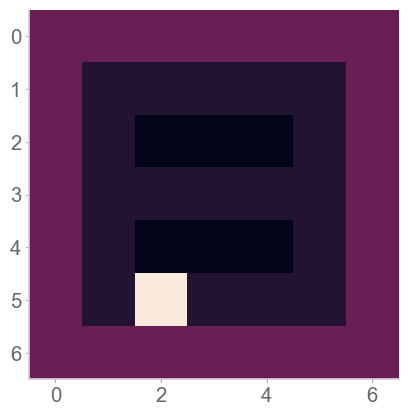

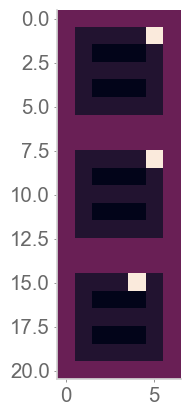

tensor([[0.8780, 0.8838, 0.8148, 0.9867]])
=====-===========


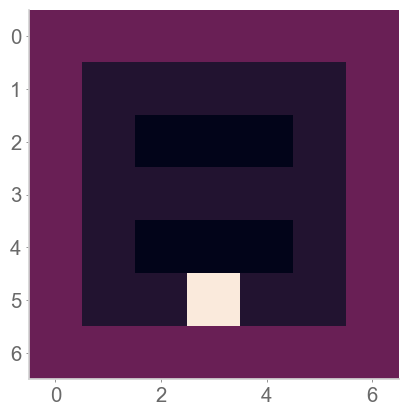

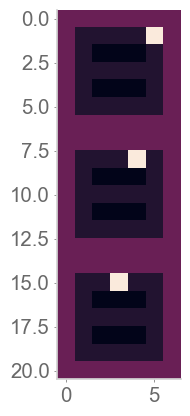

tensor([[1.0010, 0.9908, 0.8896, 1.1029]])
=====-===========


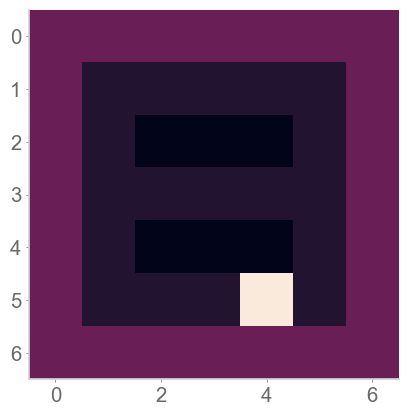

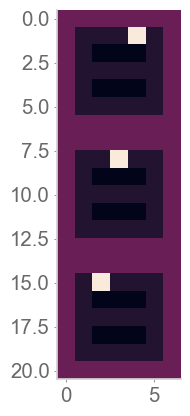

tensor([[1.1037, 1.0994, 0.9915, 1.2322]])
=====-===========


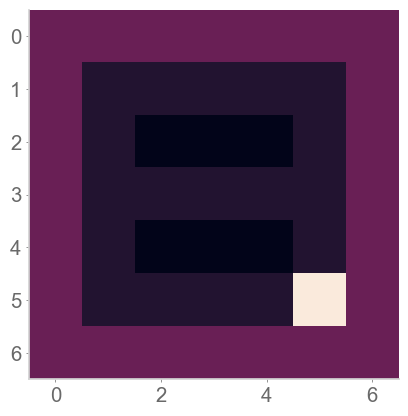

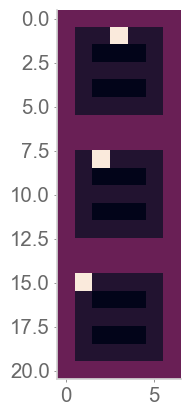

tensor([[1.2520, 1.3828, 1.0865, 1.2552]])
=====-===========


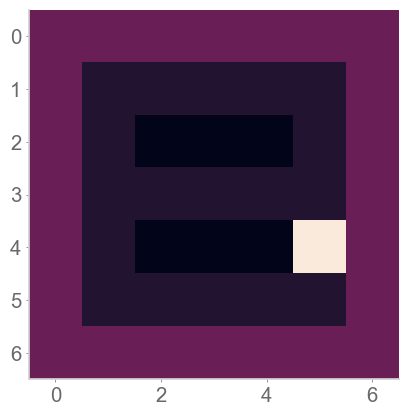

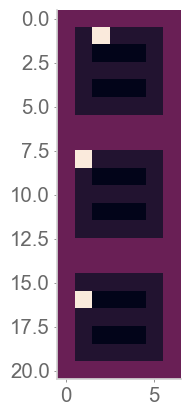

tensor([[1.3009, 1.5596, 1.3644, 1.3516]])
=====-===========


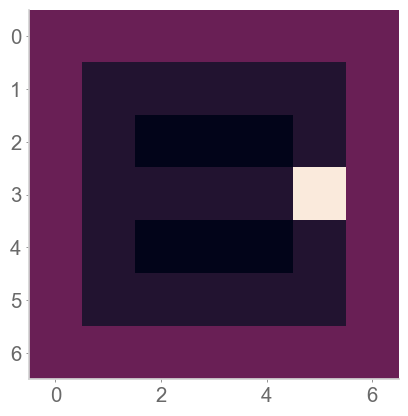

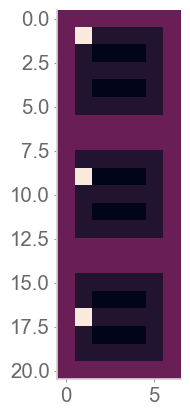

tensor([[0.7344, 0.7397, 0.8256, 0.7398]])
=====-===========


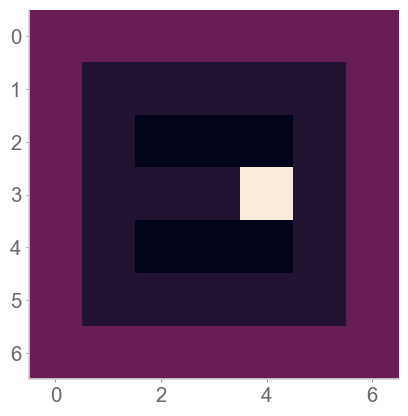

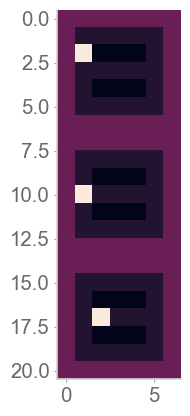

tensor([[0.8178, 0.8047, 0.9106, 0.7331]])
=====-===========


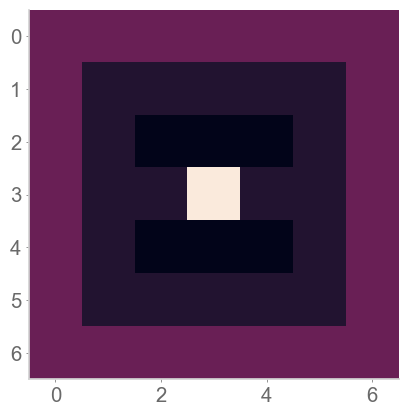

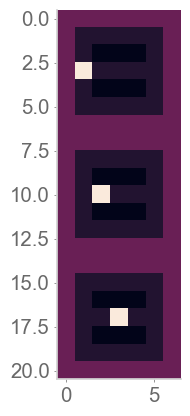

tensor([[0.9094, 0.8965, 1.0046, 0.8265]])
=====-===========


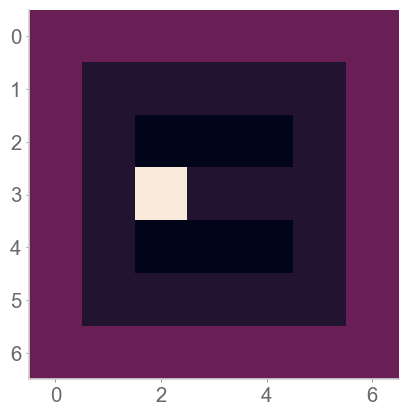

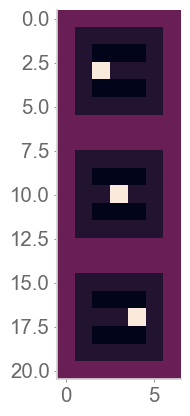

tensor([[1.0148, 0.9970, 1.1124, 0.8815]])
=====-===========


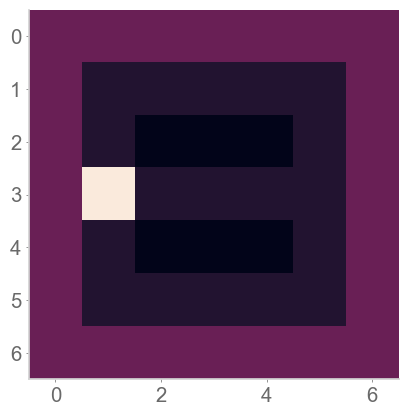

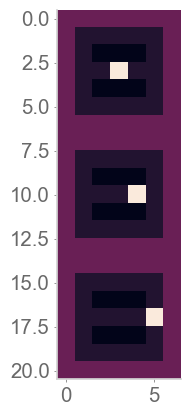

tensor([[1.2404, 1.0458, 1.1145, 1.0039]])
=====-===========


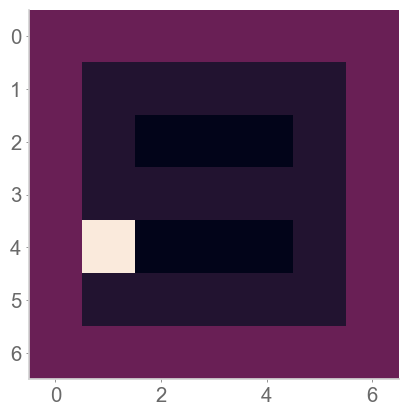

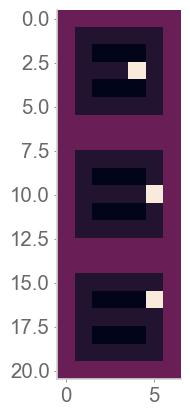

tensor([[1.3816, 1.2230, 1.2142, 1.2171]])
=====-===========


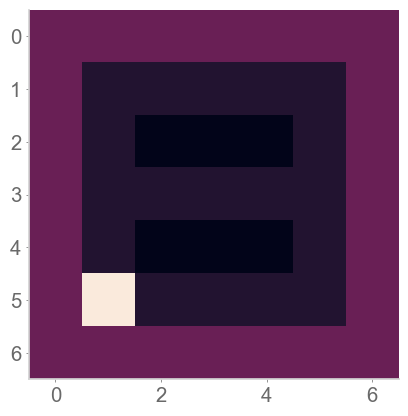

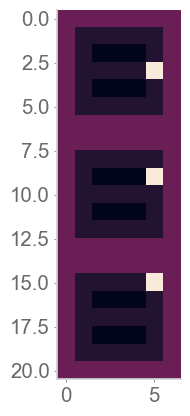

tensor([[0.8189, 0.9542, 0.7803, 0.8605]])
=====-===========


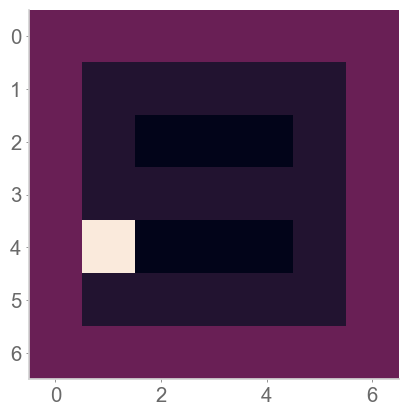

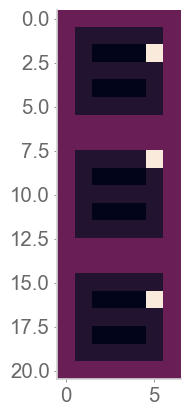

tensor([[0.9090, 1.2357, 1.0789, 1.1402]])
=====-===========


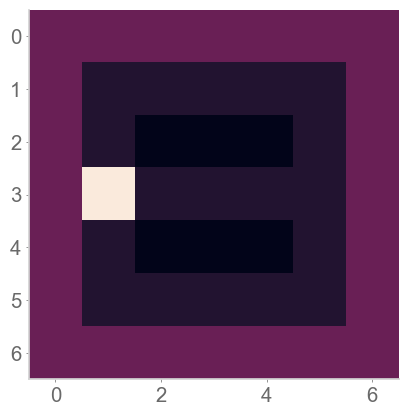

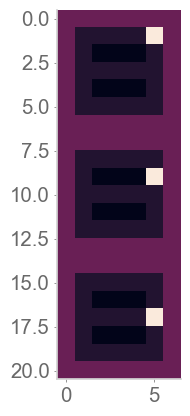

tensor([[1.0919, 1.3815, 1.1524, 1.0199]])
=====-===========


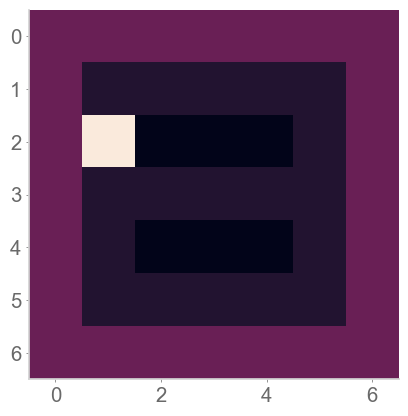

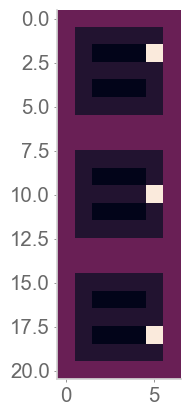

tensor([[1.0586, 1.5279, 1.2335, 1.2169]])
=====-===========


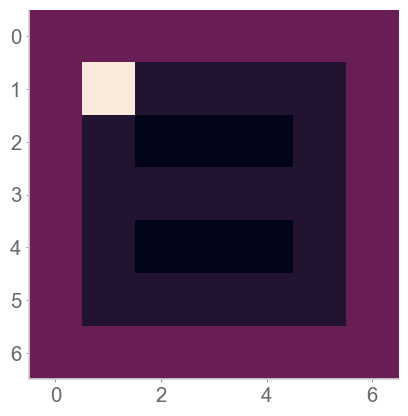

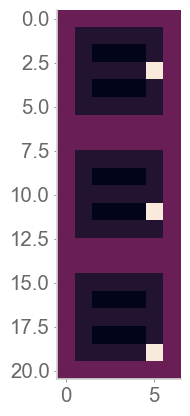

tensor([[0.7534, 0.7232, 0.7103, 0.8302]])
=====-===========


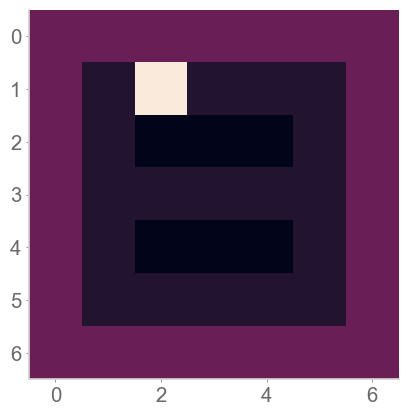

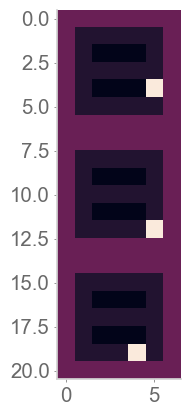

tensor([[0.8725, 0.8281, 0.7457, 0.9273]])
=====-===========


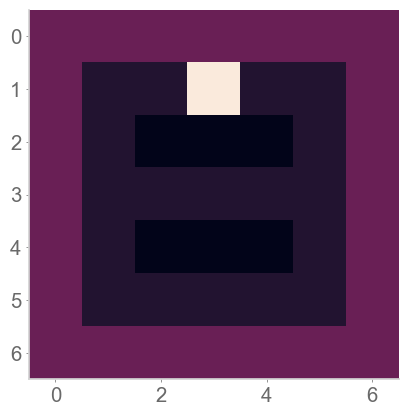

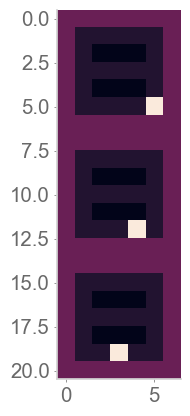

tensor([[0.9295, 0.9262, 0.8172, 1.0196]])
=====-===========


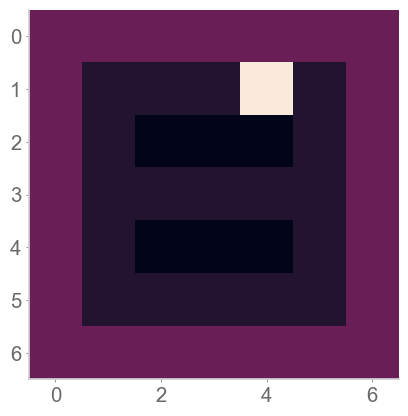

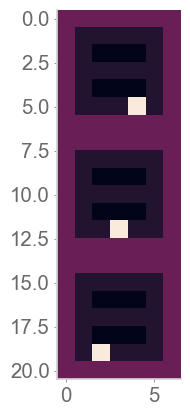

tensor([[1.0066, 1.0188, 0.9161, 1.1339]])
=====-===========


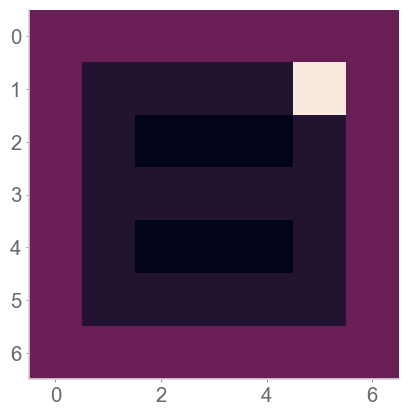

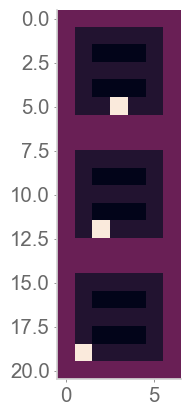

tensor([[1.2663, 1.1035, 1.0406, 1.1527]])
=====-===========


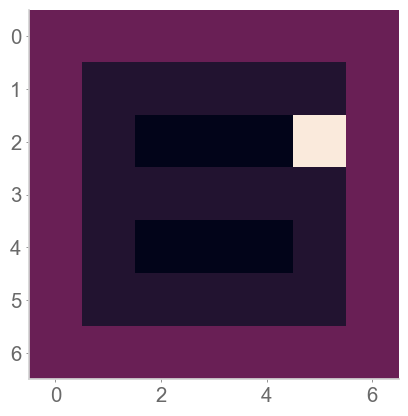

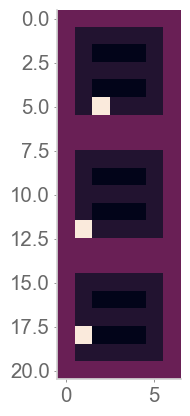

tensor([[1.4116, 1.1611, 1.2767, 1.2565]])
=====-===========


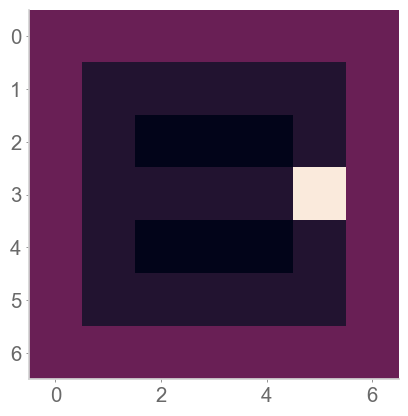

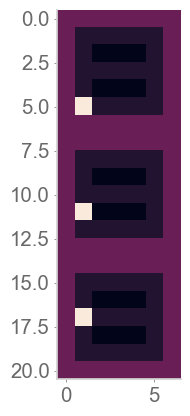

tensor([[0.7455, 0.7242, 0.8141, 0.7499]])
=====-===========


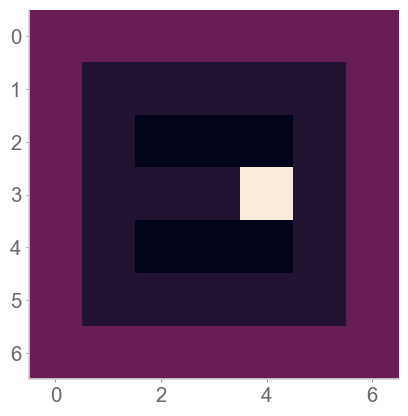

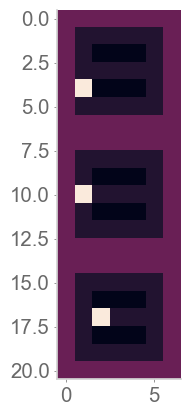

tensor([[0.8217, 0.8161, 0.9011, 0.7149]])
=====-===========


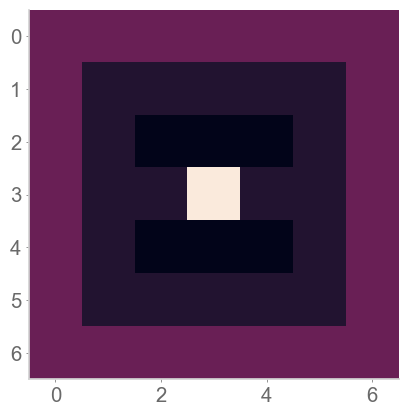

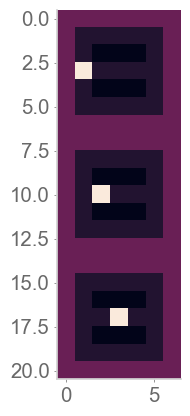

tensor([[0.9094, 0.8965, 1.0046, 0.8265]])
=====-===========


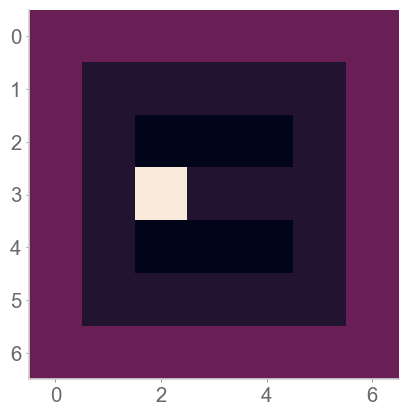

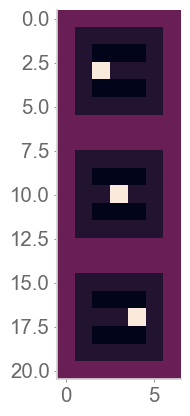

tensor([[1.0148, 0.9970, 1.1124, 0.8815]])
=====-===========


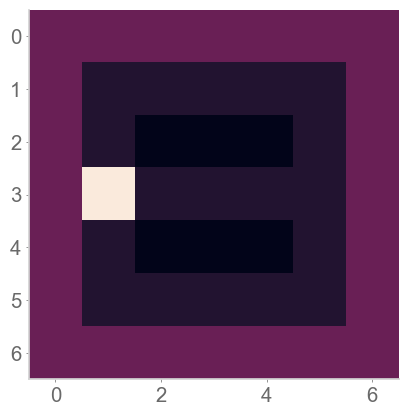

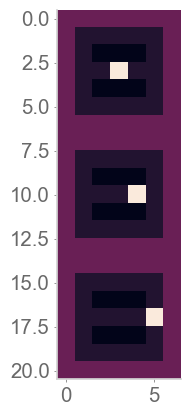

tensor([[1.2404, 1.0458, 1.1145, 1.0039]])
=====-===========


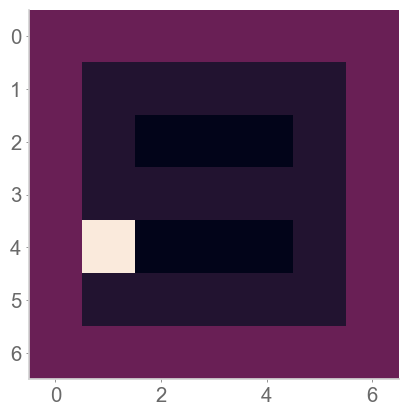

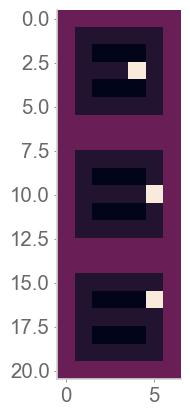

tensor([[1.3816, 1.2230, 1.2142, 1.2171]])
=====-===========


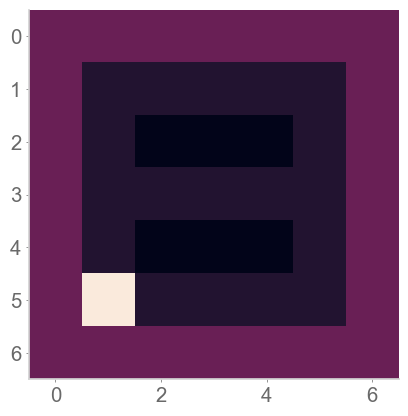

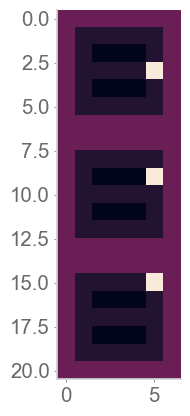

tensor([[0.8189, 0.9542, 0.7803, 0.8605]])
=====-===========


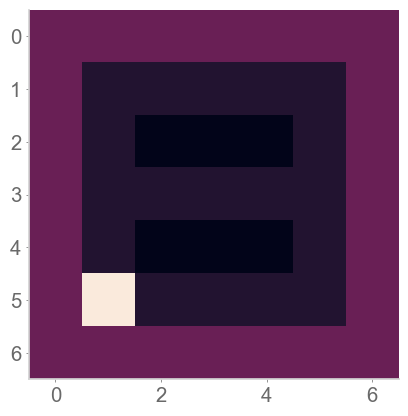

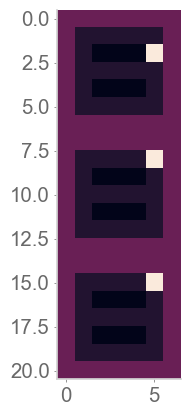

tensor([[0.7795, 0.8582, 0.7863, 0.8890]])
=====-===========


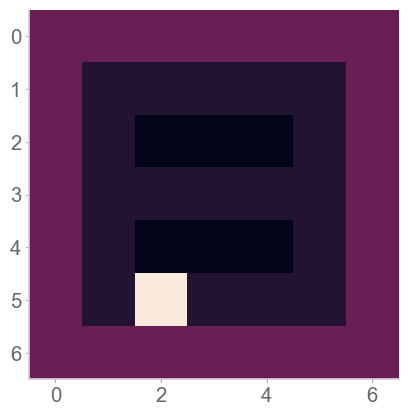

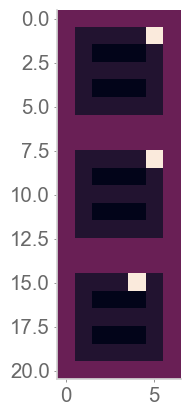

tensor([[0.8780, 0.8838, 0.8148, 0.9867]])
=====-===========


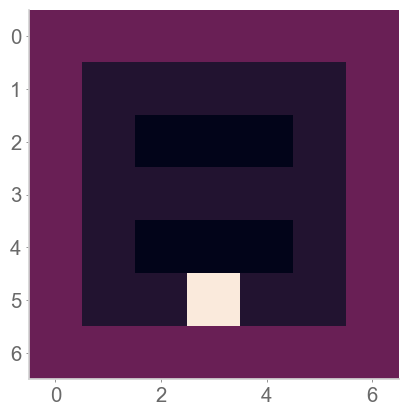

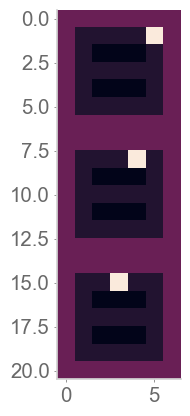

tensor([[1.0010, 0.9908, 0.8896, 1.1029]])
=====-===========


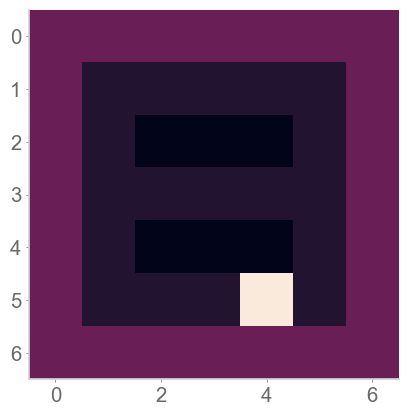

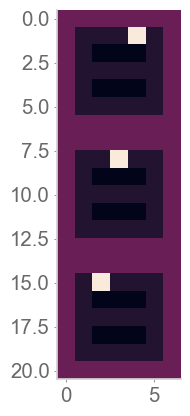

tensor([[1.1037, 1.0994, 0.9915, 1.2322]])
=====-===========


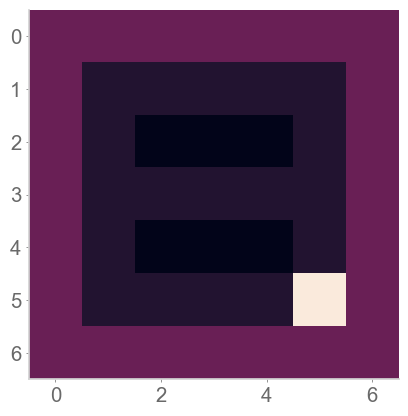

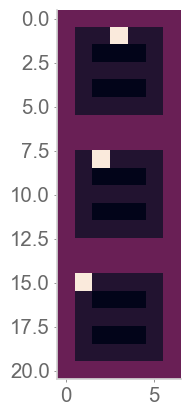

tensor([[1.2520, 1.3828, 1.0865, 1.2552]])
=====-===========


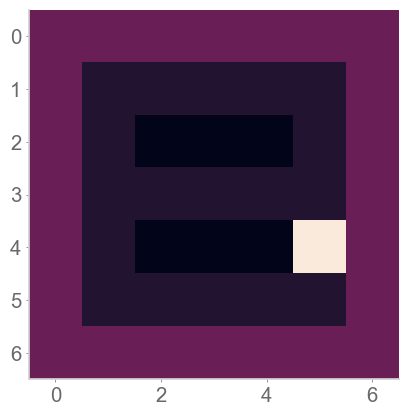

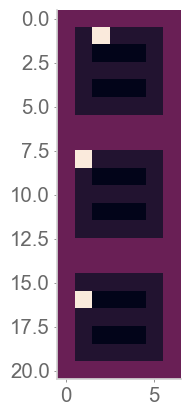

tensor([[1.3009, 1.5596, 1.3644, 1.3516]])
=====-===========


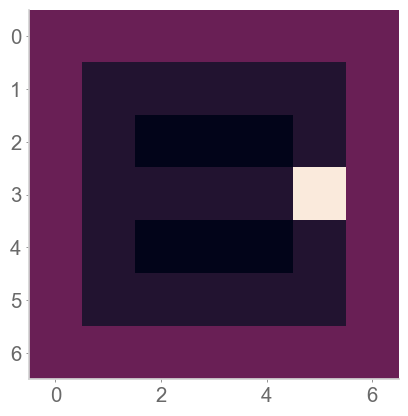

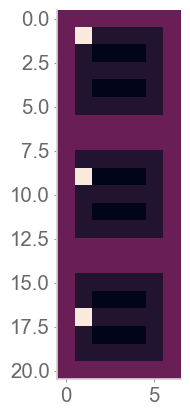

tensor([[0.7344, 0.7397, 0.8256, 0.7398]])
=====-===========


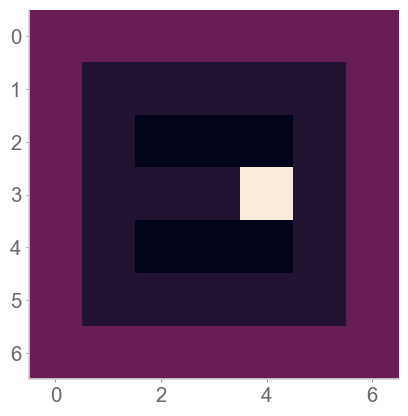

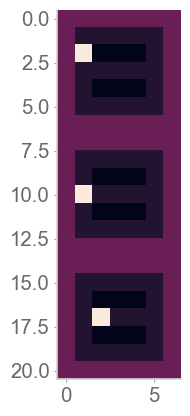

tensor([[0.8178, 0.8047, 0.9106, 0.7331]])
=====-===========


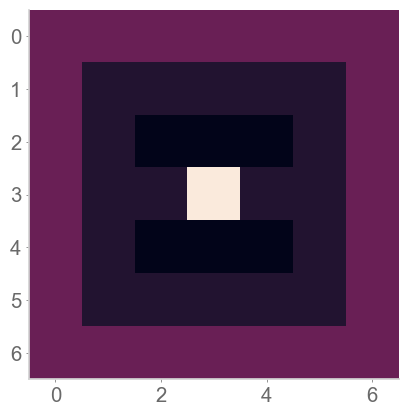

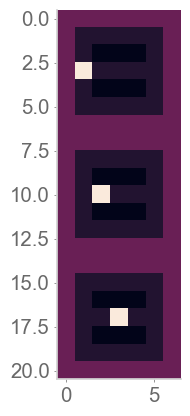

tensor([[0.9094, 0.8965, 1.0046, 0.8265]])
=====-===========


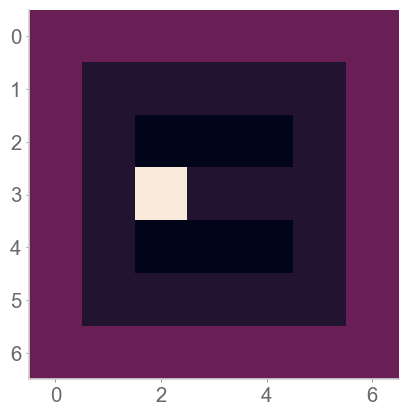

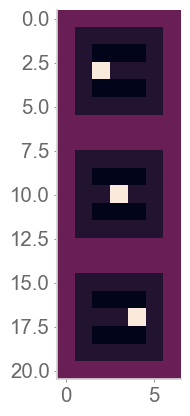

tensor([[1.0148, 0.9970, 1.1124, 0.8815]])
=====-===========


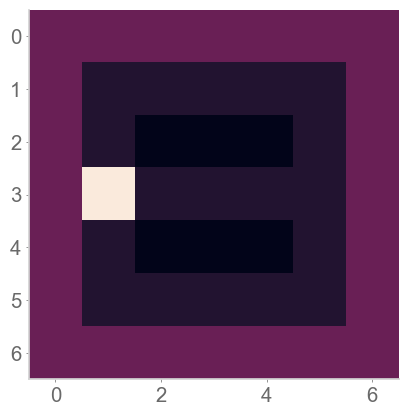

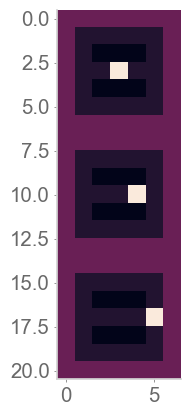

tensor([[1.2404, 1.0458, 1.1145, 1.0039]])
=====-===========


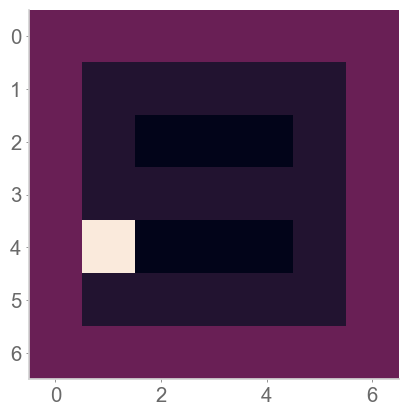

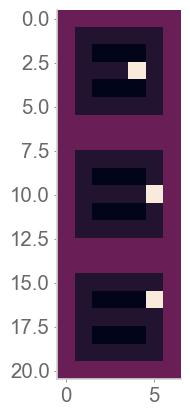

tensor([[1.3816, 1.2230, 1.2142, 1.2171]])
=====-===========


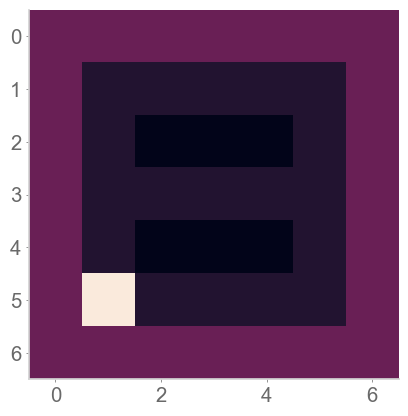

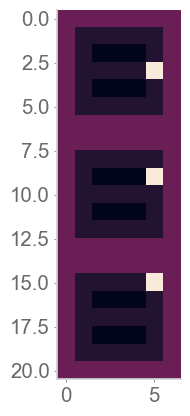

tensor([[0.8189, 0.9542, 0.7803, 0.8605]])
=====-===========


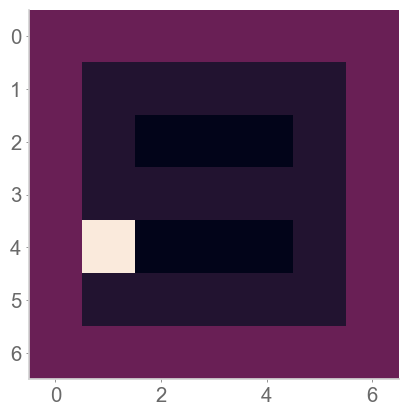

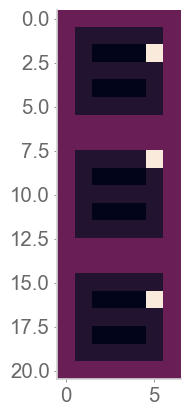

tensor([[0.9090, 1.2357, 1.0789, 1.1402]])
=====-===========


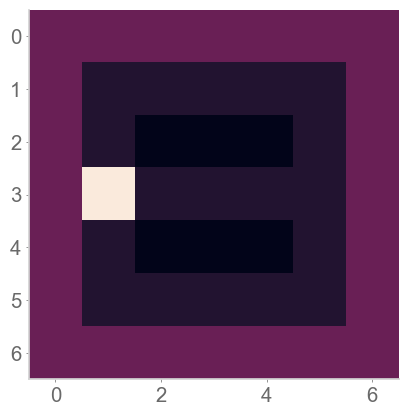

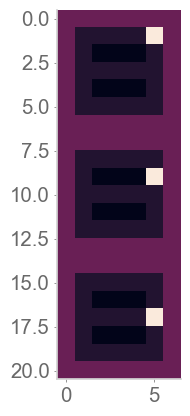

tensor([[1.0919, 1.3815, 1.1524, 1.0199]])
=====-===========


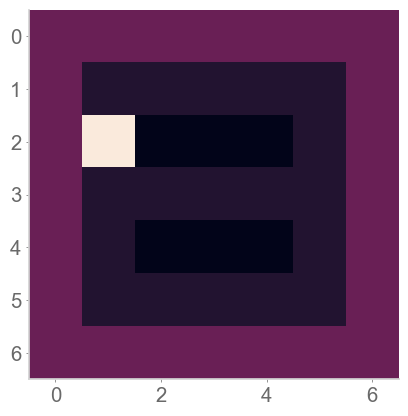

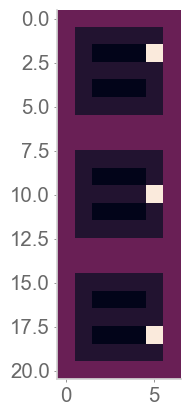

tensor([[1.0586, 1.5279, 1.2335, 1.2169]])
=====-===========


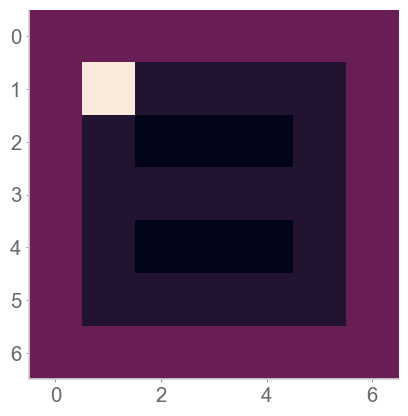

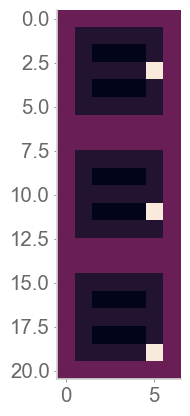

tensor([[0.7534, 0.7232, 0.7103, 0.8302]])
=====-===========


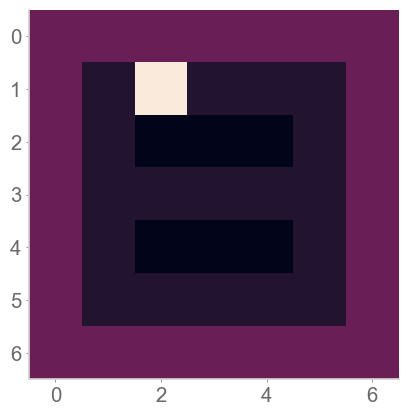

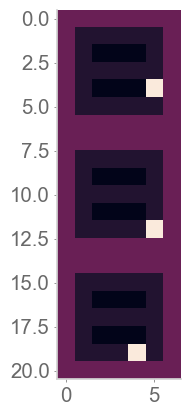

tensor([[0.8725, 0.8281, 0.7457, 0.9273]])
=====-===========


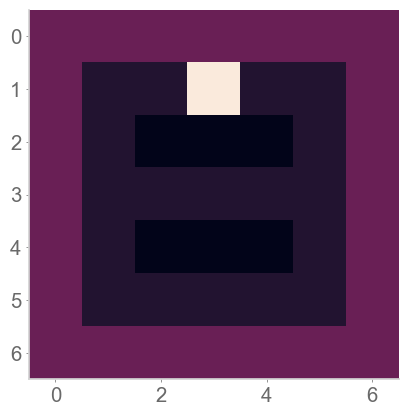

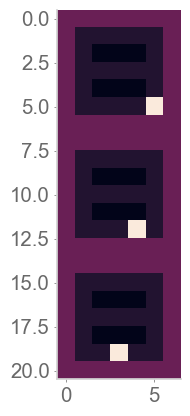

tensor([[0.9295, 0.9262, 0.8172, 1.0196]])
=====-===========


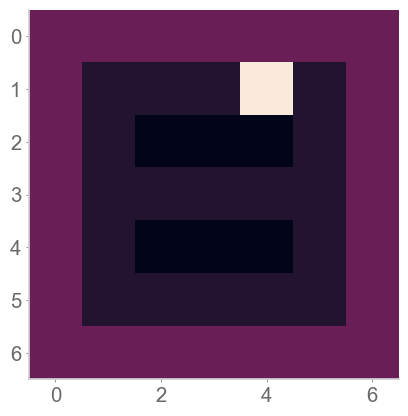

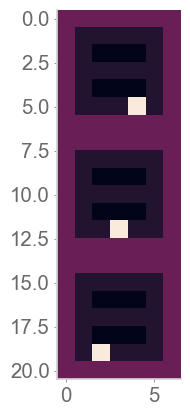

tensor([[1.0066, 1.0188, 0.9161, 1.1339]])
=====-===========


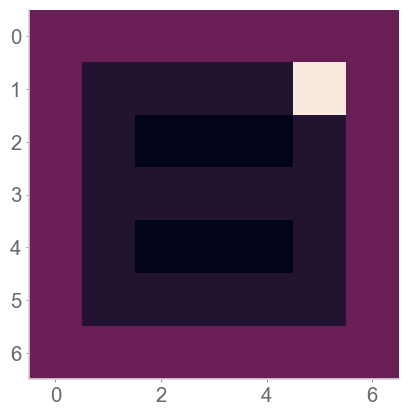

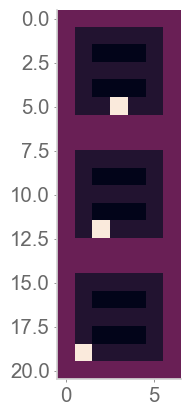

tensor([[1.2663, 1.1035, 1.0406, 1.1527]])
=====-===========


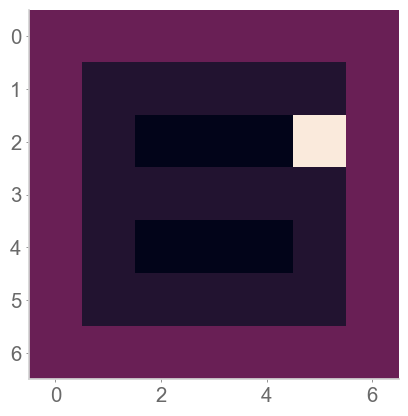

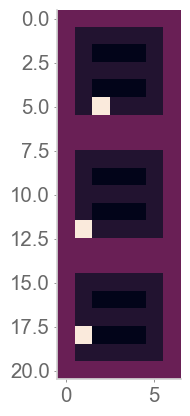

tensor([[1.4116, 1.1611, 1.2767, 1.2565]])
=====-===========


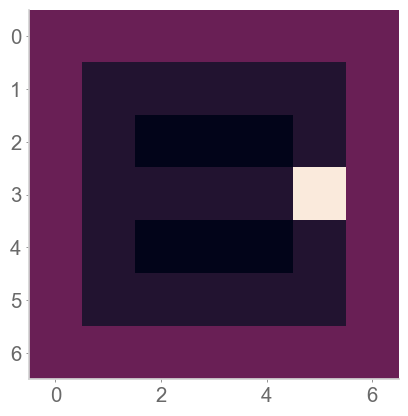

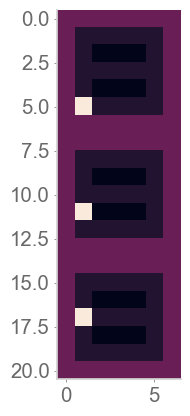

tensor([[0.7455, 0.7242, 0.8141, 0.7499]])
=====-===========


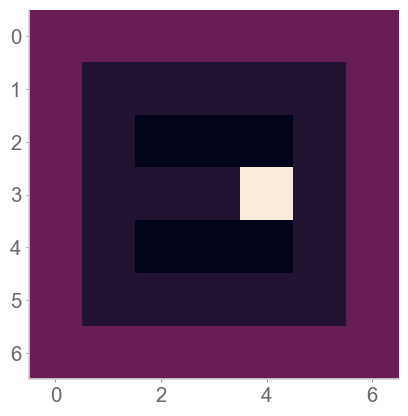

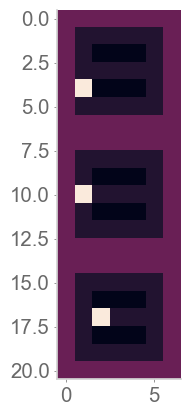

tensor([[0.8217, 0.8161, 0.9011, 0.7149]])
=====-===========


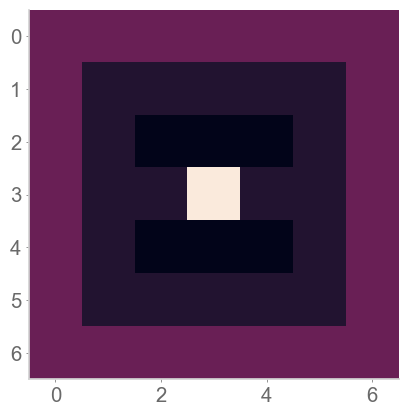

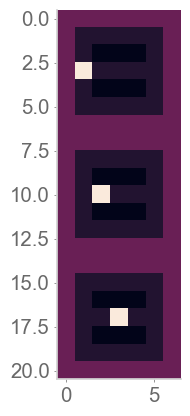

tensor([[0.9094, 0.8965, 1.0046, 0.8265]])
=====-===========


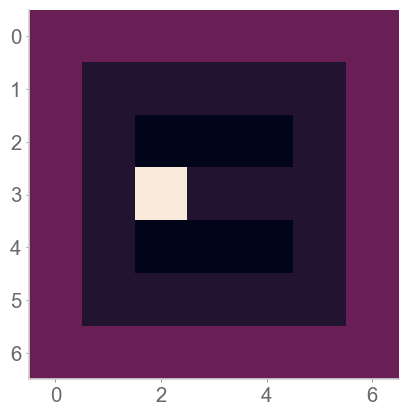

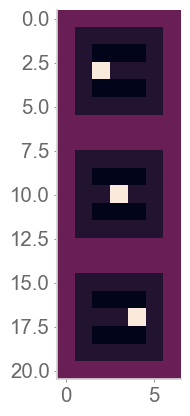

tensor([[1.0148, 0.9970, 1.1124, 0.8815]])
=====-===========


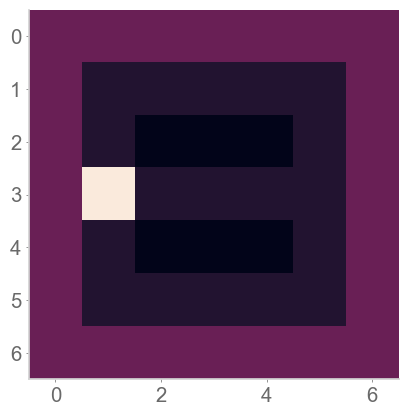

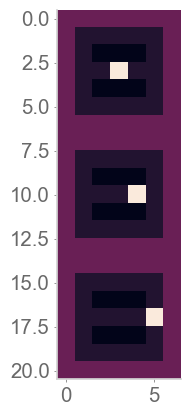

tensor([[1.2404, 1.0458, 1.1145, 1.0039]])
=====-===========


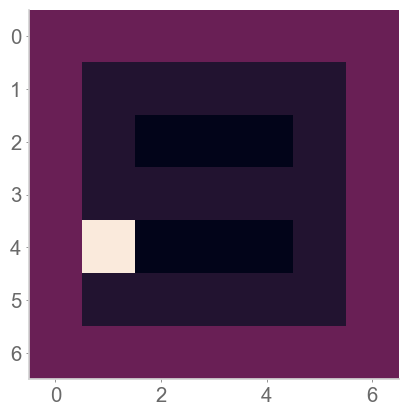

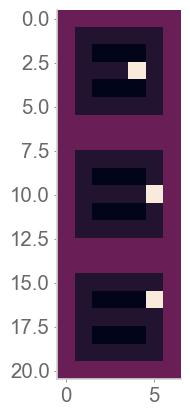

tensor([[1.3816, 1.2230, 1.2142, 1.2171]])
=====-===========


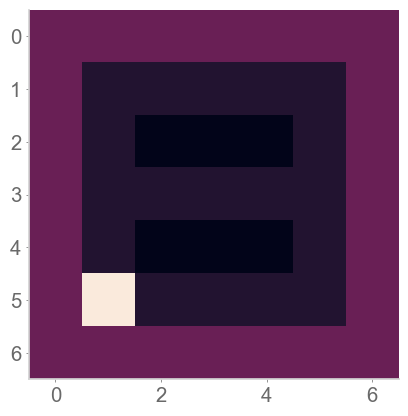

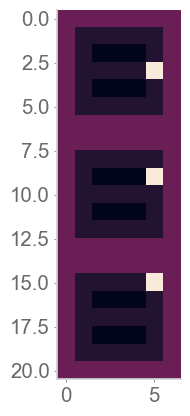

tensor([[0.8189, 0.9542, 0.7803, 0.8605]])
=====-===========


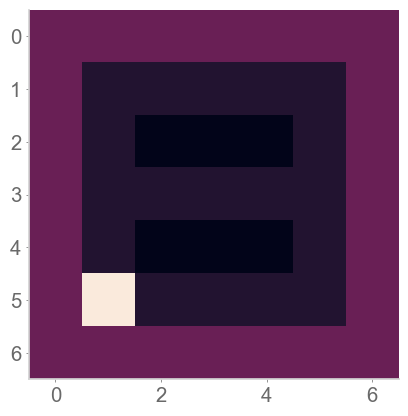

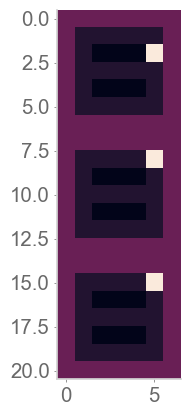

tensor([[0.7795, 0.8582, 0.7863, 0.8890]])
=====-===========


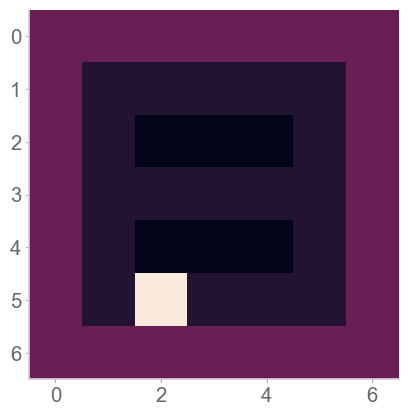

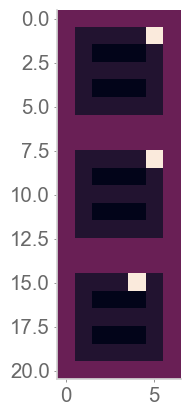

tensor([[0.8780, 0.8838, 0.8148, 0.9867]])
=====-===========


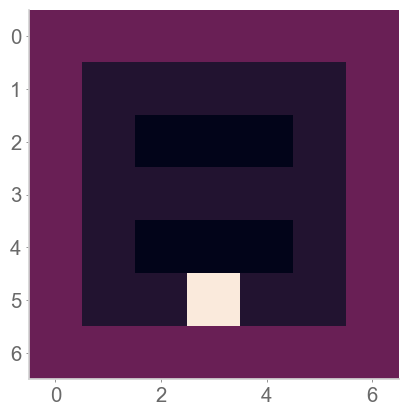

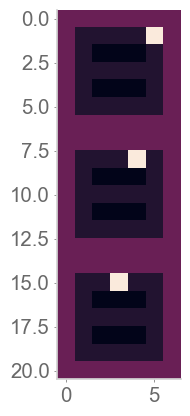

tensor([[1.0010, 0.9908, 0.8896, 1.1029]])
=====-===========


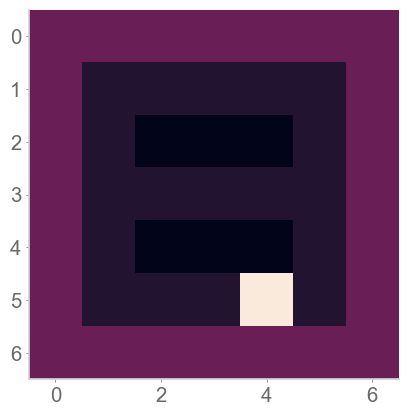

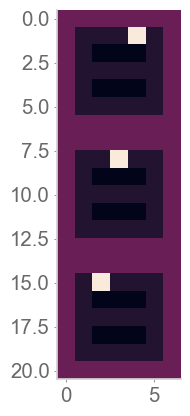

tensor([[1.1037, 1.0994, 0.9915, 1.2322]])
=====-===========


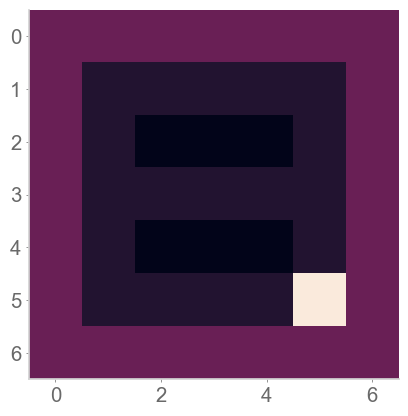

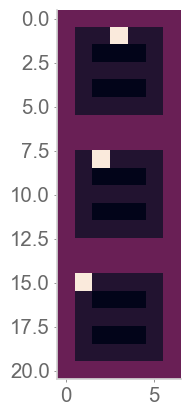

tensor([[1.2520, 1.3828, 1.0865, 1.2552]])
=====-===========


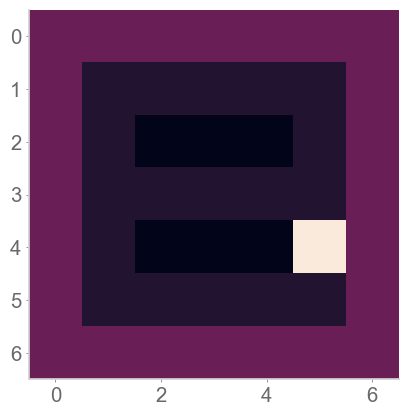

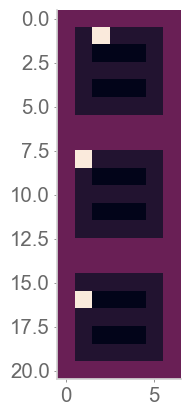

tensor([[1.3009, 1.5596, 1.3644, 1.3516]])
=====-===========


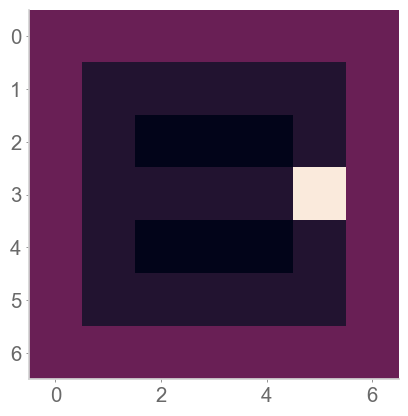

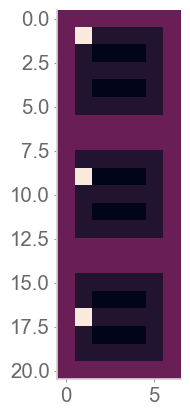

tensor([[0.7344, 0.7397, 0.8256, 0.7398]])
=====-===========


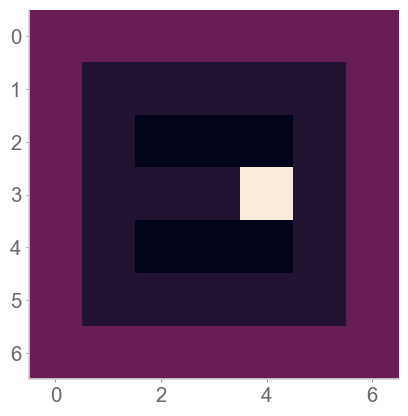

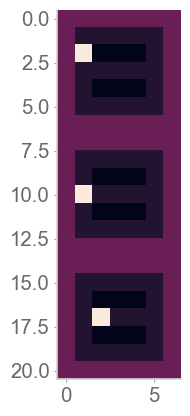

tensor([[0.8178, 0.8047, 0.9106, 0.7331]])
=====-===========


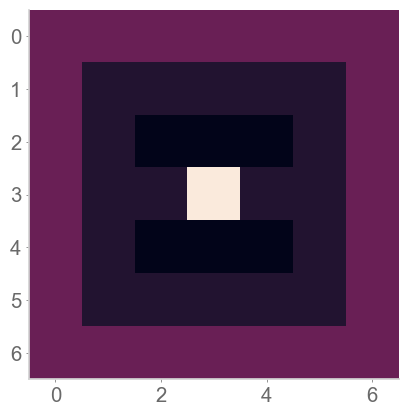

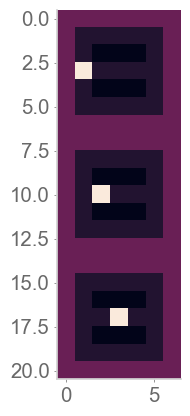

tensor([[0.9094, 0.8965, 1.0046, 0.8265]])
=====-===========


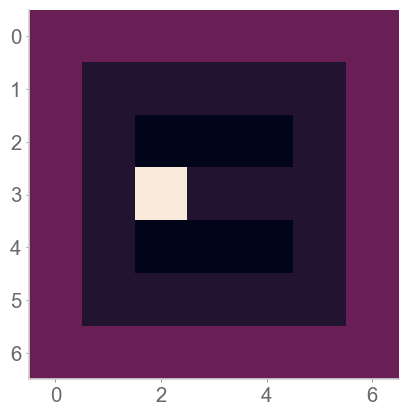

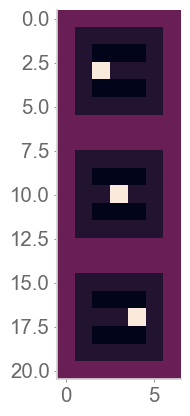

tensor([[1.0148, 0.9970, 1.1124, 0.8815]])
=====-===========


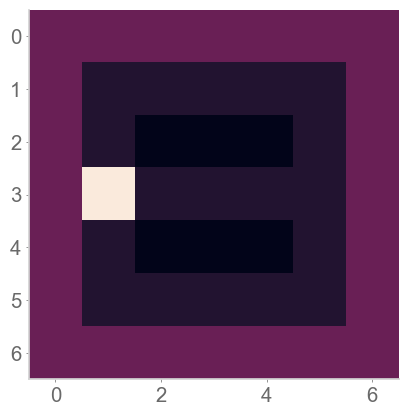

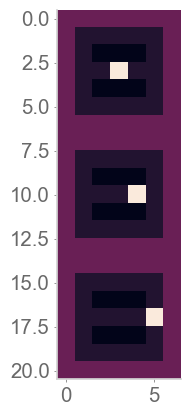

tensor([[1.2404, 1.0458, 1.1145, 1.0039]])
=====-===========


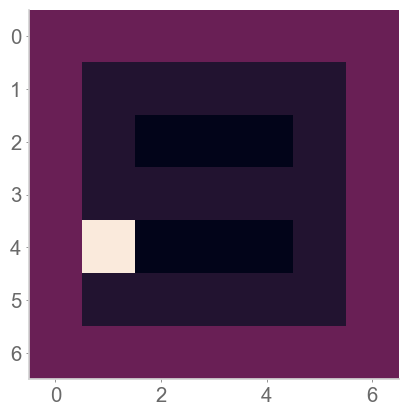

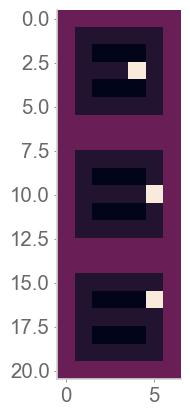

tensor([[1.3816, 1.2230, 1.2142, 1.2171]])
=====-===========


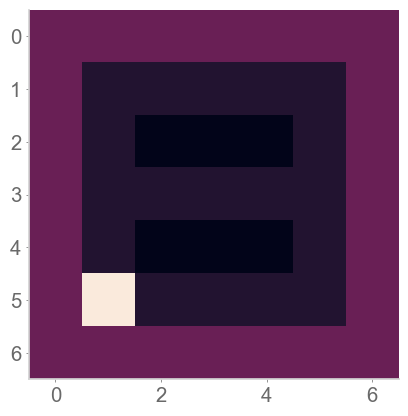

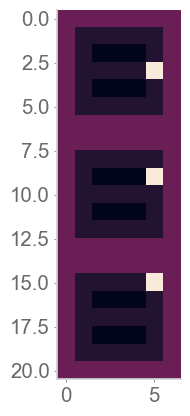

tensor([[0.8189, 0.9542, 0.7803, 0.8605]])
=====-===========


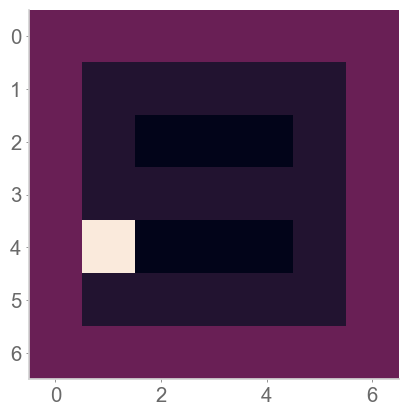

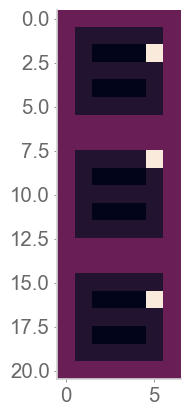

tensor([[0.9090, 1.2357, 1.0789, 1.1402]])
=====-===========


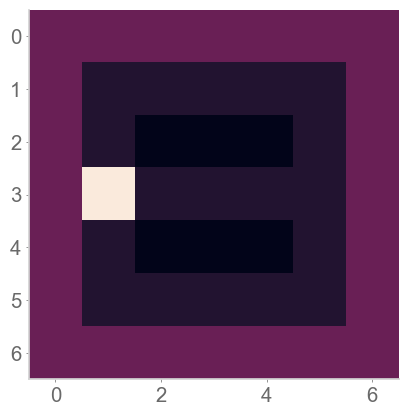

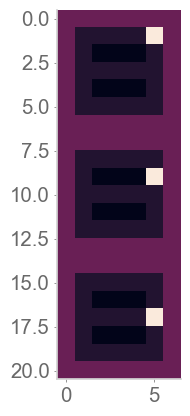

tensor([[1.0919, 1.3815, 1.1524, 1.0199]])
=====-===========


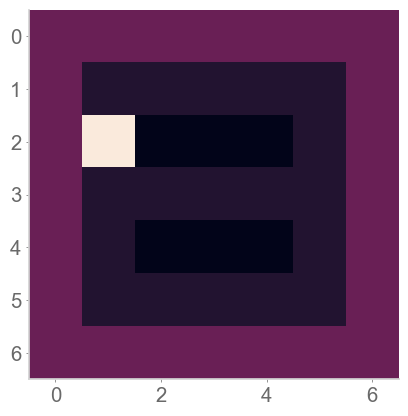

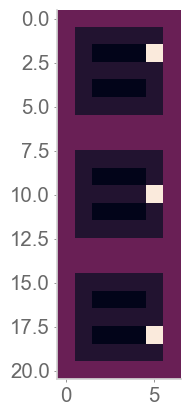

tensor([[1.0586, 1.5279, 1.2335, 1.2169]])
=====-===========


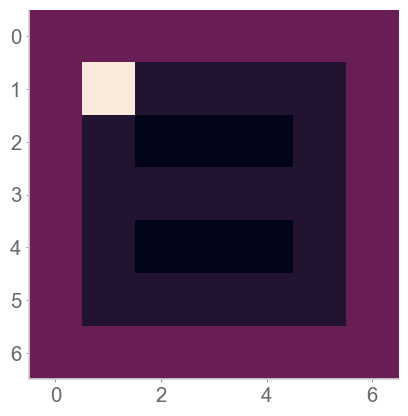

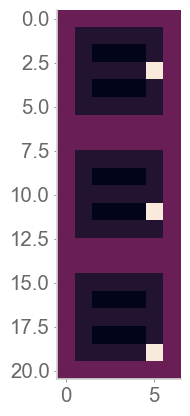

tensor([[0.7534, 0.7232, 0.7103, 0.8302]])
=====-===========


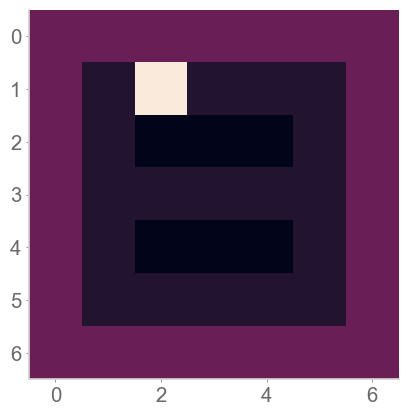

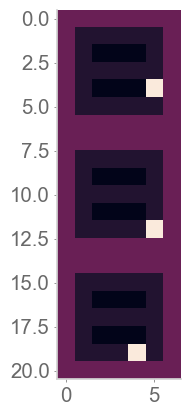

tensor([[0.8725, 0.8281, 0.7457, 0.9273]])
=====-===========


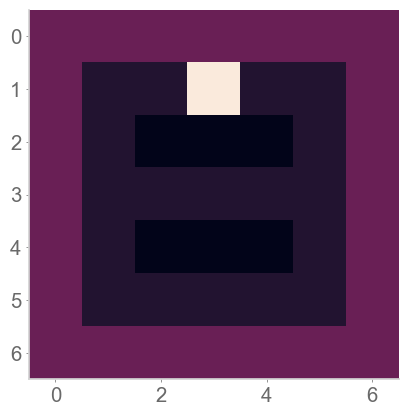

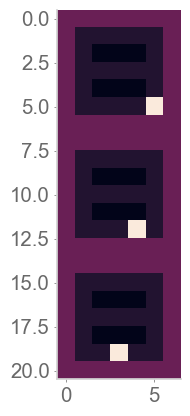

tensor([[0.9295, 0.9262, 0.8172, 1.0196]])
=====-===========


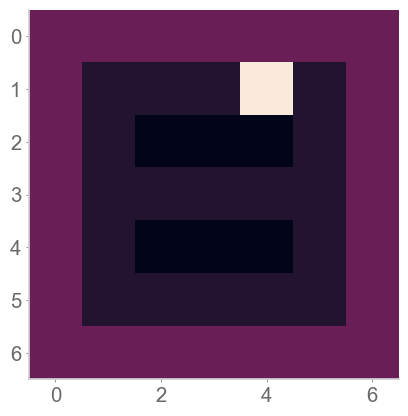

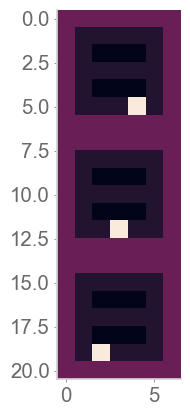

tensor([[1.0066, 1.0188, 0.9161, 1.1339]])
=====-===========


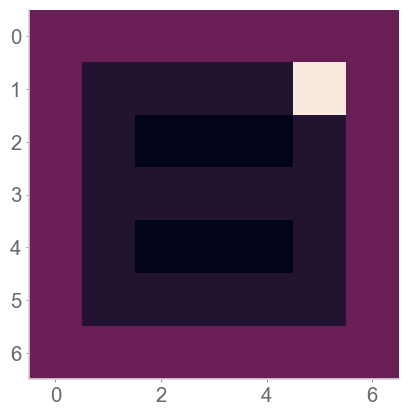

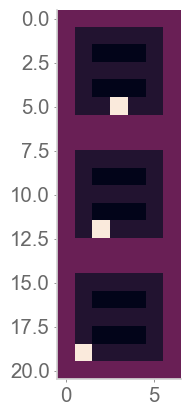

tensor([[1.2663, 1.1035, 1.0406, 1.1527]])
=====-===========


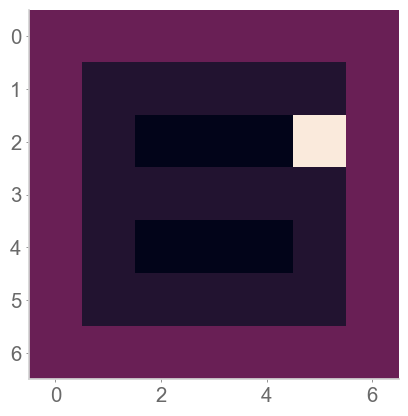

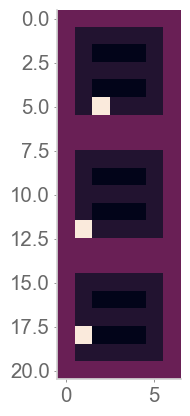

tensor([[1.4116, 1.1611, 1.2767, 1.2565]])
=====-===========


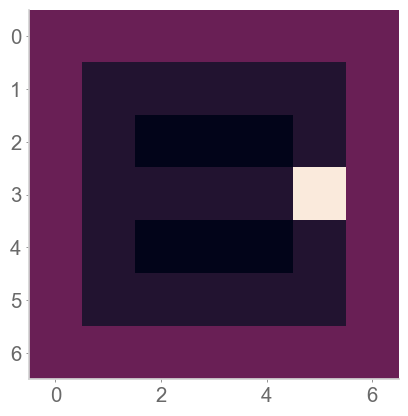

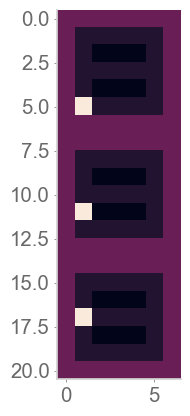

tensor([[0.7455, 0.7242, 0.8141, 0.7499]])
=====-===========


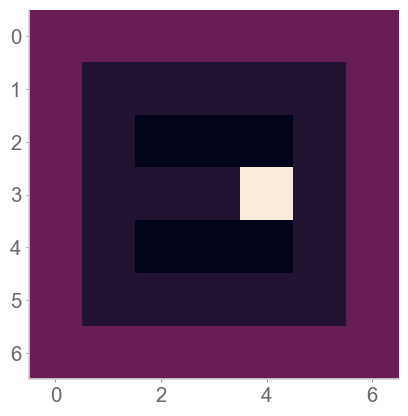

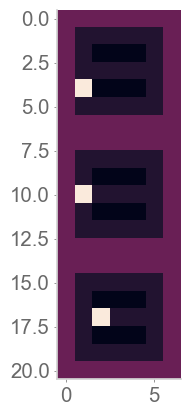

tensor([[0.8217, 0.8161, 0.9011, 0.7149]])
=====-===========


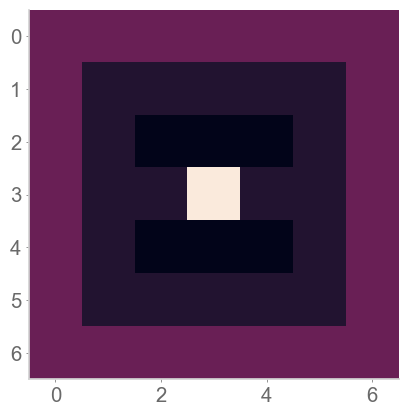

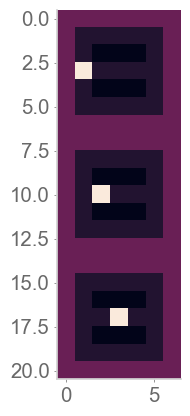

tensor([[0.9094, 0.8965, 1.0046, 0.8265]])
=====-===========


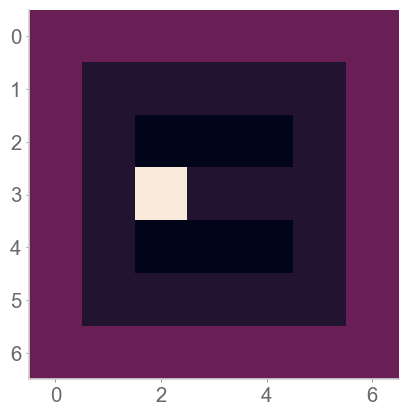

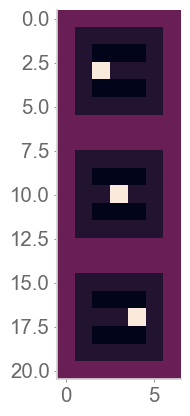

tensor([[1.0148, 0.9970, 1.1124, 0.8815]])
=====-===========


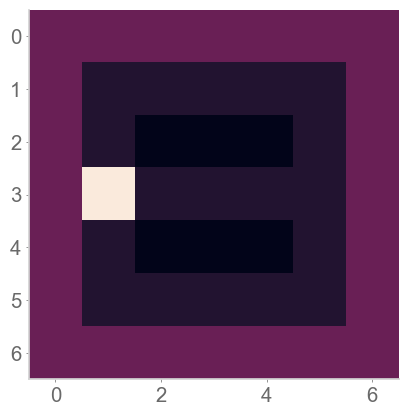

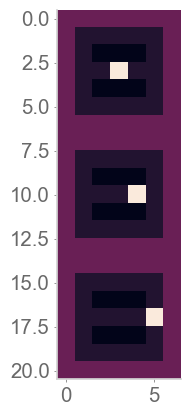

tensor([[1.2404, 1.0458, 1.1145, 1.0039]])
=====-===========


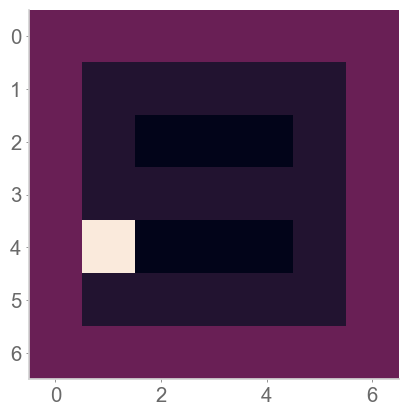

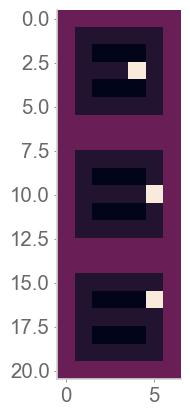

tensor([[1.3816, 1.2230, 1.2142, 1.2171]])
=====-===========


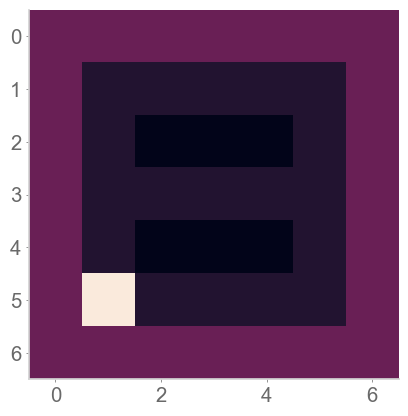

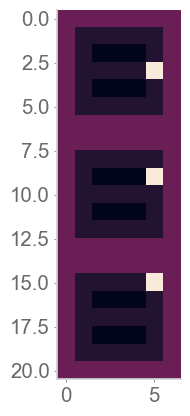

tensor([[0.8189, 0.9542, 0.7803, 0.8605]])
=====-===========


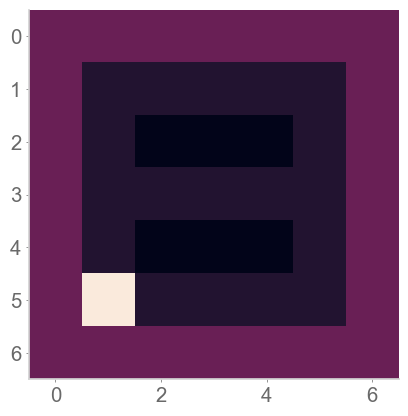

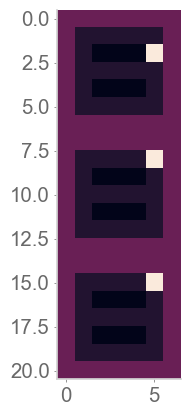

tensor([[0.7795, 0.8582, 0.7863, 0.8890]])
=====-===========


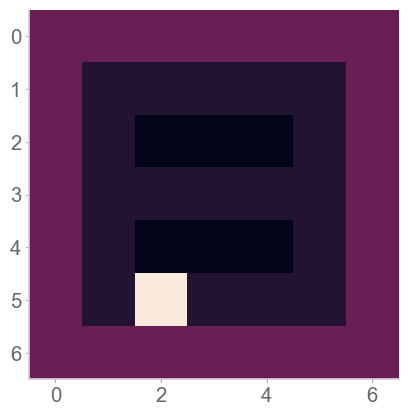

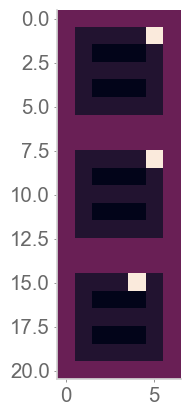

tensor([[0.8780, 0.8838, 0.8148, 0.9867]])
=====-===========


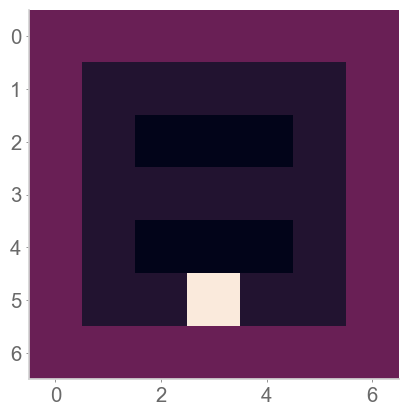

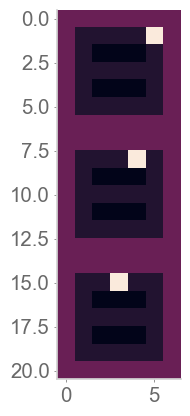

tensor([[1.0010, 0.9908, 0.8896, 1.1029]])
=====-===========


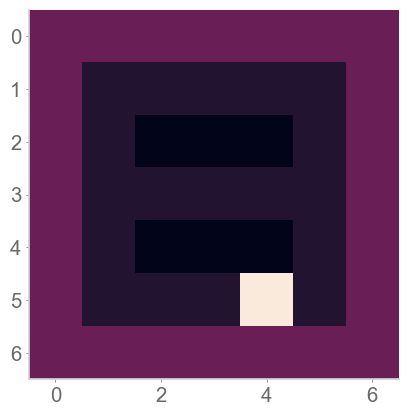

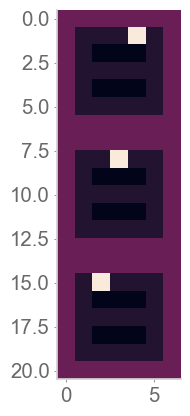

tensor([[1.1037, 1.0994, 0.9915, 1.2322]])
=====-===========


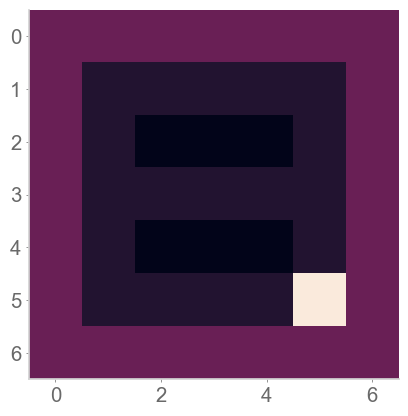

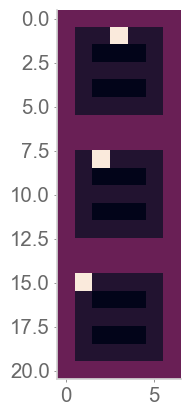

tensor([[1.2520, 1.3828, 1.0865, 1.2552]])
=====-===========


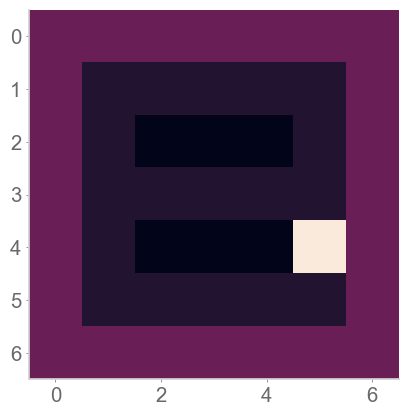

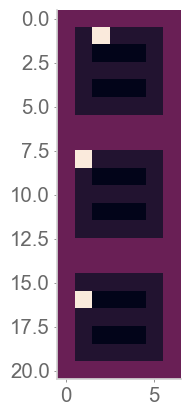

tensor([[1.3009, 1.5596, 1.3644, 1.3516]])
=====-===========


In [18]:
%matplotlib inline

for i in range(100):
    obs = env.observe()
    plt.figure()
    plt.imshow(np.flip(obs[0].squeeze()))
    plt.show()
    for i in range(len(obs)):
        agent._state[i][0:-1] = agent._state[i][1:]
        agent._state[i][-1] = obs[i]
    V, action, reward = agent._step()
    print('=====-===========')
    agent._Vs_on_last_episode.append(V)
    is_terminal = env.inTerminalState()
    if is_terminal: break

In [14]:
agent._learning_algo.crar.encoder

Encoder(
  (convs): Sequential(
    (0): Conv2d(1, 16, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=384, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=28, bias=True)
  )
)